# Assignment - 2

### Part - 1 : Linear Regression

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

dataFamily = pd.read_csv(r'C:\Users\nupur\Desktop\Family Income and Expenditure.csv')
#dataAvg = pd.read_csv()

dataFamily.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [2]:
dataFamily.shape

(41544, 60)

In [3]:
dataFamily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

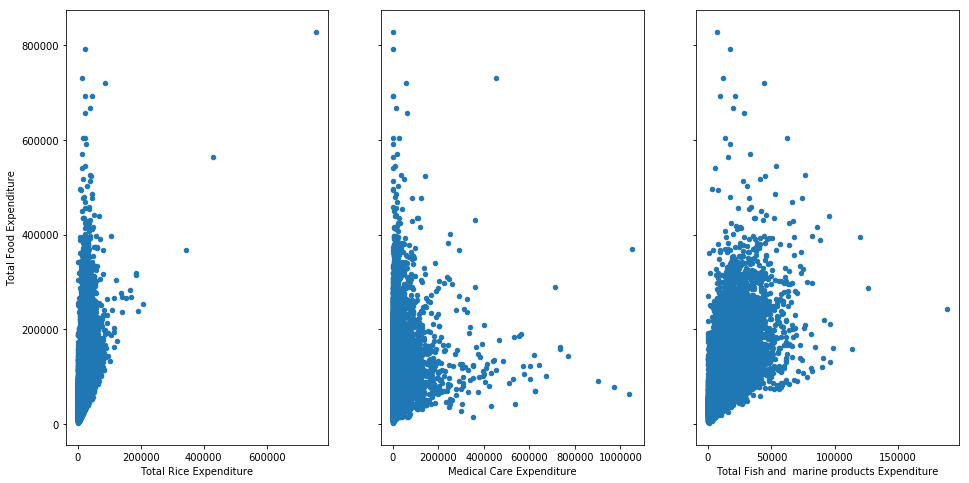

In [4]:
#Visualize relationship between total expenditure and other features using scatterplot
fig, axs = plt.subplots(1, 3, sharey=True)
dataFamily.plot(kind='scatter', x='Total Rice Expenditure', y='Total Food Expenditure', ax=axs[0], figsize=(16, 8))
dataFamily.plot(kind='scatter', x='Medical Care Expenditure', y='Total Food Expenditure', ax=axs[1])
dataFamily.plot(kind='scatter', x='Total Fish and  marine products Expenditure', y='Total Food Expenditure', ax=axs[2])

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dataFamily = dataFamily.rename(columns={'Total Food Expenditure':'Food' , 'Medical Care Expenditure':'Medical', 'Total Rice Expenditure':'Rice', 'Total Fish and  marine products Expenditure':'Fish', 'Total Income from Entrepreneurial Acitivites':'Entren','Education Expenditure':'Education'})

# create a fitted model in one line
lm = smf.ols(formula='Food ~ Medical', data=dataFamily).fit()

# print the coefficients
lm.params

C:\Users\nupur\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Intercept    82533.923081
Medical          0.358262
dtype: float64

In [6]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Medical': [dataFamily.Medical.min(), dataFamily.Medical.max()]})
X_new.head()

,Medical
0,0
1,1049275


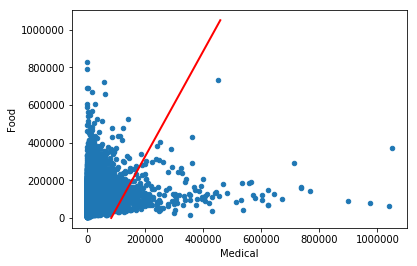

In [7]:
import statsmodels.base.model

X = dataFamily[["Medical"]]
y = dataFamily[["Food"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# first, plot the observed data
dataFamily.plot(kind='scatter', x='Medical', y='Food')
preds = results.predict(X_new)
# then, plot the least squares line
plt.plot(preds, X_new, c='red', linewidth=2)

In [1]:
#Kolmogorov-Smirnov test
from scipy import stats



In [8]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,82029.094266,83038.751895
Medical,0.340127,0.376396


In [9]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    0.0
Medical      0.0
dtype: float64

In [38]:
# print the R-squared value for the model
lm.rsquared

0.034836262659214801

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1499.
Date:                Thu, 02 Nov 2017   Prob (F-statistic):          2.96e-322
Time:                        14:13:29   Log-Likelihood:            -5.0905e+05
No. Observations:               41544   AIC:                         1.018e+06
Df Residuals:                   41542   BIC:                         1.018e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.253e+04    257.563    320.442      0.000     8.2e+04     8.3e+04
Medical        0.3583      0.009     38.722      0.000       0.340       0.376
==============================================================================
Omnibus:                    20619.889   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           243237.521
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      14.080   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be observed from above stats that, though the relationship is significant, much cannot be predicted based on only one feature. 

In [39]:
# create a fitted model in one line
lm = smf.ols(formula='Food ~ Rice', data=dataFamily).fit()

# print the coefficients
lm.params

Intercept    50173.844120
Rice             1.919414
dtype: float64

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     9745.
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:13:41   Log-Likelihood:            -5.0541e+05
No. Observations:               41544   AIC:                         1.011e+06
Df Residuals:                   41542   BIC:                         1.011e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.017e+04    420.896    119.207      0.000    4.93e+04     5.1e+04
Rice           1.9194      0.019     98.719      0.000       1.881       1.958
==============================================================================
Omnibus:                    23248.310   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376904.246
Skew:                           2.354   Prob(JB):                         0.00
Kurtosis:                      16.985   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# create a fitted model in one line
lm = smf.ols(formula='Food ~ Fish', data=dataFamily).fit()

# print the coefficients
lm.params

Intercept    42951.138962
Fish             4.002920
dtype: float64

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                 2.406e+04
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:13:48   Log-Likelihood:            -5.0029e+05
No. Observations:               41544   AIC:                         1.001e+06
Df Residuals:                   41542   BIC:                         1.001e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.295e+04    338.356    126.941      0.000    4.23e+04    4.36e+04
Fish           4.0029      0.026    155.108      0.000       3.952       4.054
==============================================================================
Omnibus:                    22862.589   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           629238.100
Skew:                           2.120   Prob(JB):                         0.00
Kurtosis:                      21.589   Cond. No.                     2.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

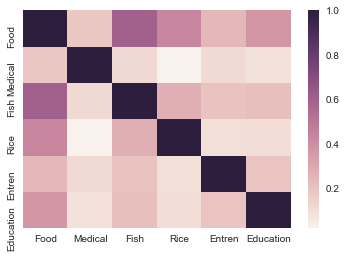

In [41]:
data_corr = dataFamily[["Food","Medical" ,"Fish", "Rice","Entren","Education"]]

sns.heatmap(data_corr.corr())

In [42]:
from patsy import dmatrices
y, X = dmatrices('Food ~ Medical + Rice + Fish + Entren + Education', dataFamily, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,4.3,Intercept
1,1.0,Medical
2,1.1,Rice
3,1.2,Fish
4,1.1,Entren
5,1.1,Education


In [84]:
X = dataFamily[["Medical" ,"Fish", "Rice","Entren","Education"]]
y = dataFamily[["Food"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[ 24335.207833] [[ 0.19036513  3.00214533  1.22591995  0.02451827  0.55536386]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Food   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 4.954e+04
Date:                Thu, 02 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:17:08   Log-Likelihood:            -4.9674e+05
No. Observations:               41544   AIC:                         9.935e+05
Df Residuals:                   41539   BIC:                         9.935e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medical        0.2150      0.007     30.913      0.000       0.201       0.229
Fish           3.7005      0.023    160.865      0.000       3.655       3.746
Rice           1.8363      0.013    137.871      0.000       1.810       1.862
Entren         0.0260      0.001     19.908      0.000       0.023       0.029
Education      0.5560      0.009     61.317      0.000       0.538       0.574
==============================================================================
Omnibus:                    16717.381   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           721530.311
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                      23.270   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.51753422288114392

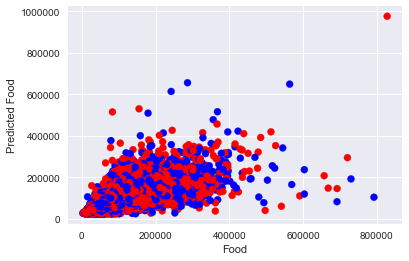

In [86]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(dataFamily.Food,lm.predict(X),color=["red","blue"])
plt.xlabel("Food")
plt.ylabel("Predicted Food")

In [87]:
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
y_m=py.mean(y)
y_m

Food    85099.158194
dtype: float64

In [88]:
from sklearn import metrics
rmse = py.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

35867.161030326926

In [90]:
rmse/y_m

Food    0.421475
dtype: float64

### Regularization

In [5]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import Ridge

X = dataFamily[["Medical" ,"Fish", "Rice","Entren","Education"]]
y = dataFamily[["Food"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred,color=["Green","blue"])
plt.xlabel("Food: $Y_i$")
plt.ylabel("Predicted Food: $\hat{y}_i$")
plt.title("Food vs Predicted Food: $Y_i$ vs $\hat{y}_i$")



NameError: name 'LinearRegression' is not defined

In [50]:
rmse = py.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

35404.680873476304

In [51]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    linreg.fit(X_train, y_train)
    scores.append(py.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
scores

[35404.680873476304,
 35404.680873476304,
 35404.680873476304,
 35404.680873476304,
 35404.680873476304]

In [52]:
import scipy.stats
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)
show_stats('Ridge Regression',rmse ,py.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 35404.681
RMSE on 5-fold CV: 35404.681


In [53]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_m=py.mean(y_pred)
y_m

84999.722830277315

In [54]:
print (rmse)
print (y_m)
rmse/y_m

35404.6808735
84999.7228303


0.41652701555474936

## Part 2 - Logistic Regression 

In [7]:
from sklearn.linear_model import LogisticRegression

dataFamily = dataFamily.rename(columns={'Household Head Sex':'Sex'})

df_sex = pd.get_dummies(dataFamily['Sex'])
dummy1 = dataFamily['Household Head Age']
df_new = pd.concat([dummy1, df_sex], axis=1)
df_new


,Household Head Age,Female,Male
0,49,1,0
1,40,0,1
2,39,0,1
3,52,0,1
4,65,0,1
5,46,0,1
6,45,0,1
7,33,0,1
8,17,1,0
9,53,0,1


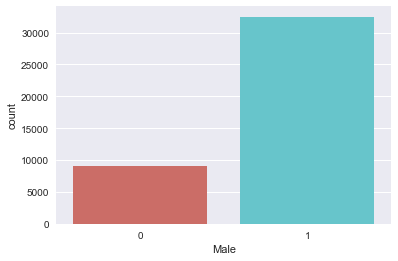

In [68]:
sns.countplot(x='Male',data=df_new,palette='hls')

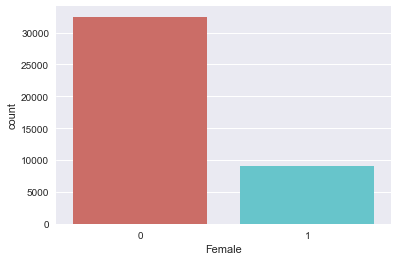

In [69]:
sns.countplot(x='Female',data=df_new,palette='hls')

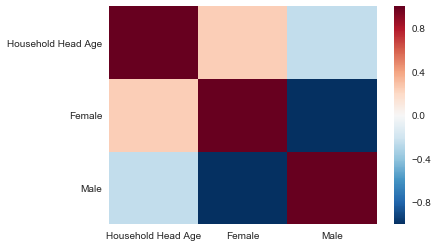

In [8]:
sns.heatmap(df_new.corr())

In [46]:
from patsy import dmatrices

df_new = df_new.rename(columns={'Household Head Age':'Age'}) 

y, X = dmatrices('Age ~ Male', df_new, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,4.6,Intercept
1,1.0,Male


In [47]:
# create a fitted model with all three features
df_new = df_new.rename(columns={'Household Head Age':'Age'}) 

lm = smf.ols(formula='Age ~ Male ', data=df_new).fit()

# print the coefficients
lm.params

Intercept    58.015340
Male         -8.484386
dtype: float64

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2707.
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:17:02   Log-Likelihood:            -1.6776e+05
No. Observations:               41544   AIC:                         3.355e+05
Df Residuals:                   41542   BIC:                         3.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.0153      0.144    402.331      0.000      57.733      58.298
Male          -8.4844      0.163    -52.028      0.000      -8.804      -8.165
==============================================================================
Omnibus:                      311.688   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.128
Skew:                           0.142   Prob(JB):                     5.98e-59
Kurtosis:                       2.727   Cond. No.                         4.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from patsy import dmatrices

df_new = df_new.rename(columns={'Household Head Age':'Age'}) 

y, X = dmatrices('Age ~ Female', df_new, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,1.3,Intercept
1,1.0,Female


In [50]:
# create a fitted model with all three features
df_new = df_new.rename(columns={'Household Head Age':'Age'}) 

lm = smf.ols(formula='Age ~ Female ', data=df_new).fit()

# print the coefficients
lm.params

Intercept    49.530955
Female        8.484386
dtype: float64

In [51]:

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2707.
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:17:25   Log-Likelihood:            -1.6776e+05
No. Observations:               41544   AIC:                         3.355e+05
Df Residuals:                   41542   BIC:                         3.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.5310      0.076    650.365      0.000      49.382      49.680
Female         8.4844      0.163     52.028      0.000       8.165       8.804
==============================================================================
Omnibus:                      311.688   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.128
Skew:                           0.142   Prob(JB):                     5.98e-59
Kurtosis:                       2.727   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X = df_new[["Age"]]
y = df_new[["Female"]]


model = LogisticRegression(random_state=0)
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[-3.59157125] [[ 0.04312284]]


C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Female   R-squared:                     -65.529
Model:                            OLS   Adj. R-squared:                -65.531
Method:                 Least Squares   F-statistic:                -4.092e+04
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               1.00
Time:                        14:38:34   Log-Likelihood:                -21107.
No. Observations:               41544   AIC:                         4.222e+04
Df Residuals:                   41543   BIC:                         4.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0045    3.7e-05    120.318      0.000       0.004       0.005
==============================================================================
Omnibus:                     7373.789   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12197.383
Skew:                           1.326   Prob(JB):                         0.00
Kurtosis:                       2.896   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm = LogisticRegression()
lm.fit(X, y)
lm.score(X, y)

C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78360292701713841

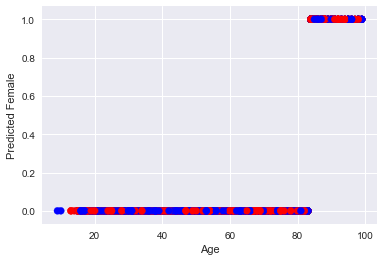

In [77]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(df_new.Age,lm.predict(X),color=["red","blue"])
plt.xlabel("Age")
plt.ylabel("Predicted Female")

In [91]:
X = df_new[["Age"]]
y = df_new[["Male"]]

model = LogisticRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[ 3.59157125] [[-0.04312284]]


C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Male   R-squared:                     -45.469
Model:                            OLS   Adj. R-squared:                -45.470
Method:                 Least Squares   F-statistic:                -4.065e+04
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               1.00
Time:                        14:53:22   Log-Likelihood:                -30475.
No. Observations:               41544   AIC:                         6.095e+04
Df Residuals:                   41543   BIC:                         6.096e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0136   4.64e-05    293.912      0.000       0.014       0.014
==============================================================================
Omnibus:                     5978.735   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9041.604
Skew:                          -1.143   Prob(JB):                         0.00
Kurtosis:                       2.973   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#from sklearn.linear_model import LinearRegression
lm = LogisticRegression()
lm.fit(X, y)
lm.score(X, y)

C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.78360292701713841

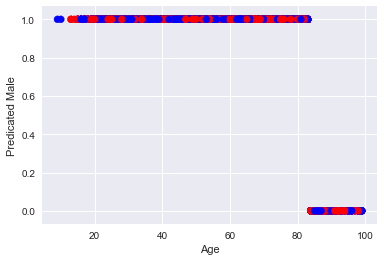

In [93]:
import matplotlib.pyplot as plt
lm.predict(X)[0:5]
plt.scatter(df_new.Age,lm.predict(X),color=["red","blue"])
plt.xlabel("Age")
plt.ylabel("Predicated Male")

In [94]:
linreg = LogisticRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
y_m=py.mean(y_pred)
y_m

C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.98697766223762762

In [95]:
from sklearn import metrics
rmse = py.sqrt(metrics.mean_squared_error(y, y_pred))
rmse


0.46518498791648633

In [96]:
rmse / y_m

0.47132271146019822

C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


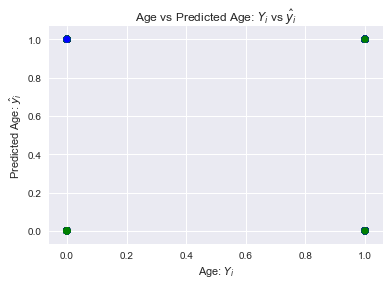

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

linreg = LogisticRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

#plt.scatter(y_test, y_pred,color=["Green","blue"])
#plt.xlabel("Age: $Y_i$")
#plt.ylabel("Predicted Age: $\hat{y}_i$")
#plt.title("Age vs Predicted Age: $Y_i$ vs $\hat{y}_i$")



In [98]:
#Goodness of fit

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print (confusion)
print (linreg.score(y_test,y_pred))

[[ 130 2559]
 [  99 9676]]
0.981627086008


In [99]:
#Accuracy calculation

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.57      0.05      0.09      2689
          1       0.79      0.99      0.88      9775

avg / total       0.74      0.79      0.71     12464



In [27]:
rmse = py.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

y_m = py.mean(y_pred)

rmse/y_m

0.47043782648490229

In [28]:
# RMSE using k-fold cross-validation
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    linreg.fit(X_train, y_train)
    scores.append(py.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
scores

C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.46179451276017169,
 0.46179451276017169,
 0.46179451276017169,
 0.46179451276017169,
 0.46179451276017169]

In [29]:
import scipy.stats
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)
show_stats('Ridge Regression',rmse ,py.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 0.462
RMSE on 5-fold CV: 0.462


In [30]:
linreg = LogisticRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X)
y_m=py.mean(y_pred)
y_m


C:\Users\Croma\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.98358367032543814

In [31]:
rmse / y_m

0.4695020125815812

In [ ]:
Modal cross validated using K-Fold technique.